Notebook pour tester le code en C

In [1]:
from ctypes import *
import matplotlib.pyplot as plt
import random
import numpy as np
from dataclasses import dataclass
import math

Importation du DLL

In [2]:
path_to_dll = "C:/Users/Toky Cedric/Desktop/Etudes/Projet Annuel/CPPDLL_ForPython/cmake-build-debug/CPPDLL_ForPython.dll"
mylib = cdll.LoadLibrary(path_to_dll)

### Modele linéaire regression

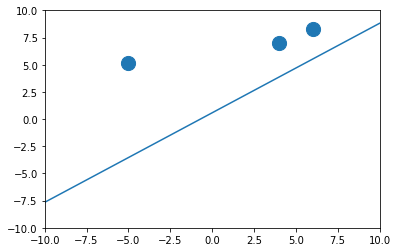

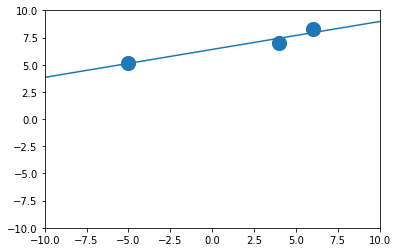

In [3]:
dataset_inputs = [
                [-5],
                [4],
                [6],
]

 

dataset_expected_outputs = [
                5.2,
                7.0,
                8.3
]

mylib.create_linear_model.argtypes = [c_int]
mylib.create_linear_model.restype = POINTER(c_float)

model = mylib.create_linear_model(1)
x = np.ctypeslib.as_array(model, (2,)) 

flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(float(p[0]))

test_dataset_inputs = []
for i in range(-10, 11):
    test_dataset_inputs.append(i)

predicted_outputs = []

for p in test_dataset_inputs:
    arrsizeP = len([p])
    arrtypeP = c_float * arrsizeP
    arrP = arrtypeP(*[p])
    mylib.predict_linear_model_regression.argtypes = [POINTER(c_float), arrtypeP, c_int]
    mylib.predict_linear_model_regression.restype = c_float

    tmp = mylib.predict_linear_model_regression(model, arrP, 2)
    predicted_outputs.append(tmp)

arrX = np.ctypeslib.as_array(model, (2,))

plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in dataset_inputs], dataset_expected_outputs, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()

arr_flat_size = len(flattened_dataset_inputs)
arr_flat_type = c_float * arr_flat_size
arr_flattened_dataset_inputs = arr_flat_type(*flattened_dataset_inputs)

arr_dataset_size = len(dataset_expected_outputs)
arr_dataset_type = c_float * arr_dataset_size
arr_dataset = arr_dataset_type(*dataset_expected_outputs)

mylib.train_regression_pseudo_inverse_linear_model.argtypes = [POINTER(c_float), arr_flat_type, arr_dataset_type, c_int, c_int,c_int]

mylib.train_regression_pseudo_inverse_linear_model(model, arr_flattened_dataset_inputs, arr_dataset,2,len(flattened_dataset_inputs), len(dataset_expected_outputs))

test_dataset_inputs = []
for i in range(-10, 11):
    temp = i
    test_dataset_inputs.append(float(temp))
    
result = []
for p in test_dataset_inputs:
    arrsizeP = len([p])
    arrtypeP = c_float * arrsizeP
    arrP = arrtypeP(*[p])
    mylib.predict_linear_model_regression.argtypes = [POINTER(c_float), arrtypeP, c_int]
    mylib.predict_linear_model_regression.restype = c_float

    tmp = mylib.predict_linear_model_regression(model, arrP, 2)
    result.append(tmp)

plt.plot(test_dataset_inputs, result)
plt.scatter([p[0] for p in dataset_inputs], dataset_expected_outputs, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()


mylib.destroy_linear_model.argtypes = [POINTER(c_float)]
mylib.destroy_linear_model.restype = None

mylib.destroy_linear_model(model)


# Utilisation du PMC pour de la classification

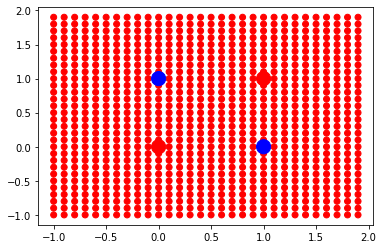

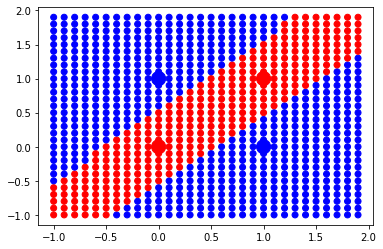

In [6]:
dataset_inputs = [
                [0, 0],
                [1, 1],
                [0, 1],
                [1, 0],
]

dataset_expected_outputs = [
                -1,
                -1,
                1,
                1,
]

init_tab = [2, 2, 1]
init_size = len(init_tab)
init_type = c_int * init_size
init = init_type(*init_tab)

# definition des fonctions : 

mylib.create_mlp_model.argtypes = [init_type, c_int]
mylib.create_mlp_model.restype = c_void_p

model = mylib.create_mlp_model(init, int(init_size))
test_dataset = [[x1 / 10, x2 / 10] for x1 in range(-10, 20) for x2 in range(-10, 20)]
colors = ["blue" if output >= 0 else "red" for output in dataset_expected_outputs]


mylib.getLengthX.argtypes = [c_void_p]
mylib.restype = c_int
tmp_len = mylib.getLengthX(model)

predicted_outputs = []
for p in test_dataset:
    arrsizeP = len(p)
    arrtypeP = c_float * arrsizeP
    arrP = arrtypeP(*p)
    mylib.predict_mlp_model_classification.argtypes = [c_void_p, arrtypeP]
    mylib.predict_mlp_model_classification.restype = POINTER(c_float)
    tmp = []
    
    tmp = mylib.predict_mlp_model_classification(model, arrP)
    np_arr = np.ctypeslib.as_array(tmp, (tmp_len,))
    predicted_outputs.append(np_arr[0])
    
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in dataset_inputs], [p[1] for p in dataset_inputs], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(p[0])
  flattened_dataset_inputs.append(p[1])

    
#definition de train_classification_stochastic_gradient....
arrsize_flat = len(flattened_dataset_inputs)
arrtype_flat = c_float * arrsize_flat
arr_flat = arrtype_flat(*flattened_dataset_inputs)

arrsize_exp = len(dataset_expected_outputs)
arrtype_exp = c_float * arrsize_exp
arr_exp = arrtype_exp(*dataset_expected_outputs)

mylib.train_classification_stochastic_gradient_backpropagation_mlp_model.argtypes = [c_void_p, arrtype_flat, c_int, arrtype_exp,c_float,c_int]
mylib.train_classification_stochastic_gradient_backpropagation_mlp_model.restype = None

mylib.train_classification_stochastic_gradient_backpropagation_mlp_model(model, arr_flat, arrsize_flat, arr_exp,0.001, 100000)
predicted_outputs = []
for p in test_dataset:
    arrsizeP = len(p)
    arrtypeP = c_float * arrsizeP
    arrP = arrtypeP(*p)
    mylib.predict_mlp_model_classification.argtypes = [c_void_p, arrtypeP]
    mylib.predict_mlp_model_classification.restype = POINTER(c_float)
    tmp = []
    
    tmp = mylib.predict_mlp_model_classification(model, arrP)
    np_arr = np.ctypeslib.as_array(tmp, (tmp_len,))
    predicted_outputs.append(np_arr[0])
    
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in dataset_inputs], [p[1] for p in dataset_inputs], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(p[0])
  flattened_dataset_inputs.append(p[1])

### MLP regression

In [ ]:
dataset_inputs = [
                [-5],
                [4],
                [6],
]

 

dataset_expected_outputs = [
                1.2,
                7,
                8.3
]

 


x = [1, 3, 1]
arr_sizex = len(x)
arr_typex = c_int * arr_sizex
arrx = arr_typex(*x)

mylib.create_mlp_model.argtypes = [arr_typex, c_int]
mylib.create_mlp_model.restype = c_void_p

model = mylib.create_mlp_model(arrx, int(arr_sizex))

flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(p[0])

 

test_dataset_inputs = [i for i in range(-10, 11)]

predicted_outputs = []
for p in test_dataset_inputs:
    arr_sizeP = len([p])
    arr_typeP = c_float * arr_sizeP
    arrP = arr_typeP(*[p])
    
    mylib.predict_mlp_model_regression.argtypes = [c_void_p, arr_typeP]
    mylib.predict_mlp_model_regression.restype = POINTER(c_float)
    tmp=[]
    
    tmp = mylib.predict_mlp_model_regression(model, arrP)
    predicted_outputs.append(tmp[0])

 
plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in dataset_inputs], dataset_expected_outputs, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()

#définition du tableau
arrsize_flat = len(flattened_dataset_inputs)
arrtype_flat = c_float * arrsize_flat
arr_flat = arrtype_flat(*flattened_dataset_inputs)

arrsize_exp = len(dataset_expected_outputs)
arrtype_exp = c_float * arrsize_exp
arr_exp = arrtype_exp(*dataset_expected_outputs)


mylib.train_regression_stochastic_gradient_backpropagation_mlp_model.argtypes = [c_void_p, arrtype_flat, c_int, arrtype_exp, c_float, c_int]
mylib.train_regression_stochastic_gradient_backpropagation_mlp_model.restype = None

mylib.train_regression_stochastic_gradient_backpropagation_mlp_model(model,arr_flat,arrsize_flat, arr_exp,0.001, 100000)

test_dataset_inputs = [i for i in range(-10, 11)]

predicted_outputs = []
for p in test_dataset_inputs:
    arr_sizeP = len([p])
    arr_typeP = c_float * arr_sizeP
    arrP = arr_typeP(*[p])
    
    mylib.predict_mlp_model_regression.argtypes = [c_void_p, arr_typeP]
    mylib.predict_mlp_model_regression.restype = POINTER(c_float)
    tmp=[]
    
    tmp = mylib.predict_mlp_model_regression(model, arrP)
   
    predicted_outputs.append(tmp[0])
        
plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in dataset_inputs], dataset_expected_outputs, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()

# Utilisation du MLP pour de la classification à 3 classes

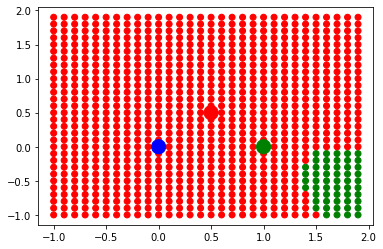

In [17]:
dataset_inputs = [
                [0, 0],
                [0.5, 0.5],
                [1, 0],
]

dataset_expected_outputs = [
                [1, -1, -1],
                [-1, 1, -1],
                [-1, -1, 1]
]

init_tab = [2, 3, 3]
init_size = len(init_tab)
init_type = c_int * init_size
init = init_type(*init_tab)

# definition des fonctions : 

mylib.create_mlp_model.argtypes = [init_type, c_int]
mylib.create_mlp_model.restype = c_void_p

model = mylib.create_mlp_model(init, int(init_size))
test_dataset = [[x1 / 10, x2 / 10] for x1 in range(-10, 20) for x2 in range(-10, 20)]
colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for output in dataset_expected_outputs]

mylib.getLengthX.argtypes = [c_void_p]
mylib.restype = c_int
tmp_len = mylib.getLengthX(model)


predicted_outputs = []
for p in test_dataset:
    arrsizeP = len(p)
    arrtypeP = c_float * arrsizeP
    arrP = arrtypeP(*p)
    mylib.predict_mlp_model_classification.argtypes = [c_void_p, arrtypeP]
    mylib.predict_mlp_model_classification.restype = POINTER(c_float)

    tmp = mylib.predict_mlp_model_classification(model, arrP)
    np_arr = np.ctypeslib.as_array(tmp, (tmp_len,))
    predicted_outputs.append(np_arr)
    
predicted_outputs_colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for output in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in dataset_inputs], [p[1] for p in dataset_inputs], c=colors, s=200)
plt.show()



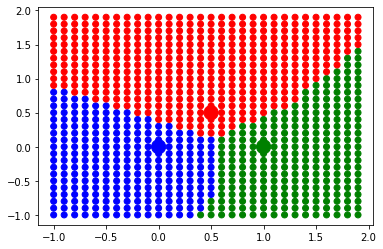

In [18]:
flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(p[0])
  flattened_dataset_inputs.append(p[1])

flattened_dataset_outputs = []
for p in dataset_expected_outputs:
  flattened_dataset_outputs.append(p[0])
  flattened_dataset_outputs.append(p[1])
  flattened_dataset_outputs.append(p[2])

#definition de train_classification_stochastic_gradient....
arrsize_flat = len(flattened_dataset_inputs)
arrtype_flat = c_float * arrsize_flat
arr_flat = arrtype_flat(*flattened_dataset_inputs)

arrsize_exp = len(flattened_dataset_outputs)
arrtype_exp = c_float * arrsize_exp
arr_exp = arrtype_exp(*flattened_dataset_outputs)

mylib.train_classification_stochastic_gradient_backpropagation_mlp_model.argtypes = [c_void_p, arrtype_flat, c_int, arrtype_exp,c_float,c_int]
mylib.train_classification_stochastic_gradient_backpropagation_mlp_model.restype = None
mylib.train_classification_stochastic_gradient_backpropagation_mlp_model(model, arr_flat, arrsize_flat, arr_exp, 0.001,10000)

predicted_outputs = []
for p in test_dataset:
    arrsizeP = len(p)
    arrtypeP = c_float * arrsizeP
    arrP = arrtypeP(*p)
    mylib.predict_mlp_model_classification.argtypes = [c_void_p, arrtypeP]
    mylib.predict_mlp_model_classification.restype = POINTER(c_float)

    tmp = mylib.predict_mlp_model_classification(model, arrP)
    np_arr = np.ctypeslib.as_array(tmp, (tmp_len,))
    predicted_outputs.append(np_arr)

predicted_outputs_colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for output in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in dataset_inputs], [p[1] for p in dataset_inputs], c=colors, s=200)
plt.show()

### Modele lineaire pour la classification

In [ ]:
dataset_inputs = [
                [3, 4],
                [6, 5],
                [4, 7],
]

 

dataset_expected_outputs = [
                1,
                1,
                -1,
]

mylib.create_linear_model.argtypes = [c_int]
mylib.create_linear_model.restype = POINTER(c_float)

model = mylib.create_linear_model(2)

x = np.ctypeslib.as_array(model, (3,))
# print(x)

test_dataset = [[x1, x2] for x1 in range(-10, 10) for x2 in range(-10, 10)]
colors = ["blue" if output >= 0 else "red" for output in dataset_expected_outputs]

predicted_outputs = []

for p in test_dataset:
    arr_size = len(p)
    arr_type = c_float * arr_size
    arr = arr_type(*p)
    mylib.predict_linear_model_classification.argtypes = [POINTER(c_float), arr_type, c_int]
    mylib.predict_linear_model_classification.restype = c_float 

    tmp = mylib.predict_linear_model_classification(model, arr, len(x))
    predicted_outputs.append(tmp)

### notebook --> len modifie le résultat
predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in dataset_inputs], [p[1] for p in dataset_inputs], c=colors, s=200)
plt.show()


flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(p[0])
  flattened_dataset_inputs.append(p[1])
    
arr_size_flattened = len(flattened_dataset_inputs)
arr_type_flattened = c_float * arr_size_flattened
arr_flattened = arr_type_flattened(*flattened_dataset_inputs)

arr_size_outputs = len(dataset_expected_outputs)
arr_type_outputs = c_float * arr_size_outputs
arr_outputs = arr_type_outputs(*dataset_expected_outputs)

mylib.train_classification_rosenblatt_rule_linear_model.argtypes = [POINTER(c_float), arr_type_flattened, arr_type_outputs, c_float, c_int, c_int, c_int]
mylib.train_classification_rosenblatt_rule_linear_model.restype = None
mylib.train_classification_rosenblatt_rule_linear_model(model, arr_flattened, arr_outputs, 0.001, 10000, len(x), len(flattened_dataset_inputs))

result = []
for p in test_dataset:
    arr_size_result = len(p)
    arr_type_result = c_float * arr_size_result
    arr_result = arr_type_result(*p)
    mylib.predict_linear_model_classification.argtypes = [POINTER(c_float), arr_type_result, c_int]
    mylib.predict_linear_model_classification.restype = c_float

 

    tmp = mylib.predict_linear_model_classification(model, arr_result, len(x))
    result.append(tmp)

 

predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in result]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in dataset_inputs], [p[1] for p in dataset_inputs], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(p[0])
  flattened_dataset_inputs.append(p[1])

mylib.destroy_linear_model.argtypes = [POINTER(c_float)]
mylib.destroy_linear_model.restype = None
mylib.destroy_linear_model(model)